![Growdev](https://www.growdev.com.br/assets/images/logo_growdev.png)

![Formação Engenharia de Dados](https://d335luupugsy2.cloudfront.net/cms/files/524558/1707226566/$occu5m8t1op)

Este material tem como objetivo incentivar a prática dos conteúdos estudados até o momento, e a pesquisa. Tenha em consideração que o exercício foi pensado para incentivar a prática dos conteúdos estudados até então, porém aprender a pesquisar faz parte do processo de aprendizagem.

Fique tranquilo, faça os exercícios com calma, e boa prática!


#Orientações:

 - Faça uma copia deste arquivo
 - Após concluir os exercicios, suba seu exercicio para o GitHub e compartilhe o link no **google** Classroom


#Exercícios pandas e plot

As questões a seguir utilizam como base o dataset de venda de jogos eletrônicos disponível no seguinte [link.](https://www.kaggle.com/code/rafa84miranda/vendas-de-jogos-de-videogames/data?select=vgsales.csv)

Os campos são:
- Rank: posição no ranking de vendas
- Name: nome do jogo
- Platform: plataforma/console
- Year: ano de lançamento
- Genre: gênero
- Publisher: empresa que publicou o jogo
- NA_Sales: vendas na américa do norte (em milhões de dólares)
- EU_Sales: vendas na europa (em milhões de dólares)
- JP_Sales: vendas no japão (em milhões de dólares)
- Other_Sales: outras vendas (em milhões de dólares)
- Global_Sales: vendas globais (em milhões de dólares)


In [ ]:
#Importando as bibliotecas necessárias para a análise
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [ ]:
#Importando o dataset
dataset = pd.read_csv("vgsales.csv")

display(dataset.head())



,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:

#Renomeando as Colunas
dataset.columns = ['Ranking', 'Nome', 'Plataforma', 'Ano', 'Gênero', 'Editora', 'Vendas América do Norte', 'Vendas EUA', 'Vendas Japão', 'Outras Vendas', 'Vendas Globais']
display(dataset.head())


,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Globais
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


In [ ]:
#Procurando dados nulos na coluna 'Ano'
dataset[dataset['Ano'].isnull()].head()

,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Globais


Qual foi o jogo mais vendido no mundo em 2010?



In [ ]:
# prompt: Qual foi o jogo mais vendido no mundo em 2010?

ano_2010 = dataset[dataset['Ano'] == 2010]
jogo_mais_vendido_2010 = ano_2010.loc[ano_2010['Vendas Globais'] == ano_2010['Vendas Globais'].max()]
display(jogo_mais_vendido_2010)


,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Globais
11183,16,Kinect Adventures!,X360,2010,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82


Qual foi a empresa que mais vendeu de 2005 até 2016 - Construa um gráfico de barras para apresentar


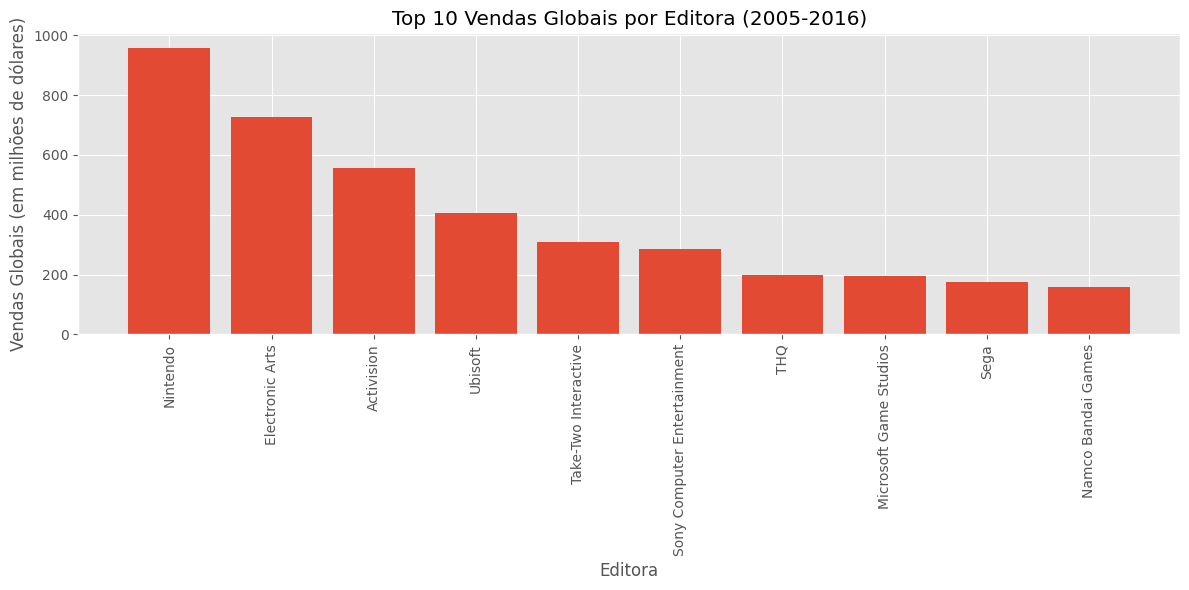

In [ ]:
vendas_2005_2016 = dataset[(dataset['Ano'] >= 2005) & (dataset['Ano'] <= 2016)]
vendas_por_editora = vendas_2005_2016.groupby('Editora')['Vendas Globais'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.bar(vendas_por_editora.index, vendas_por_editora.values)
plt.xlabel('Editora')
plt.ylabel('Vendas Globais (em milhões de dólares)')
plt.title('Top 10 Vendas Globais por Editora (2005-2016)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Qual o nome do jogo que menos foi vendido em 2008 do gênero Sports.


Nome
Fab 5 Soccer                                      0.01
G1 Jockey 4 2008                                  0.01
Major Dream: Major Wii Nagero! Gyroball!!         0.01
Summer Athletics                                  0.01
Family Jockey                                     0.01
Chou!! Super Nep League DS                        0.02
Major Dream: Major DS Dream Baseball              0.02
Mesaze!! Tsuri Master: Sekai ni Challenge! Hen    0.02
Polar Bowler                                      0.02
Ten Pin Alley 2                                   0.02
Name: Vendas Globais, dtype: float64

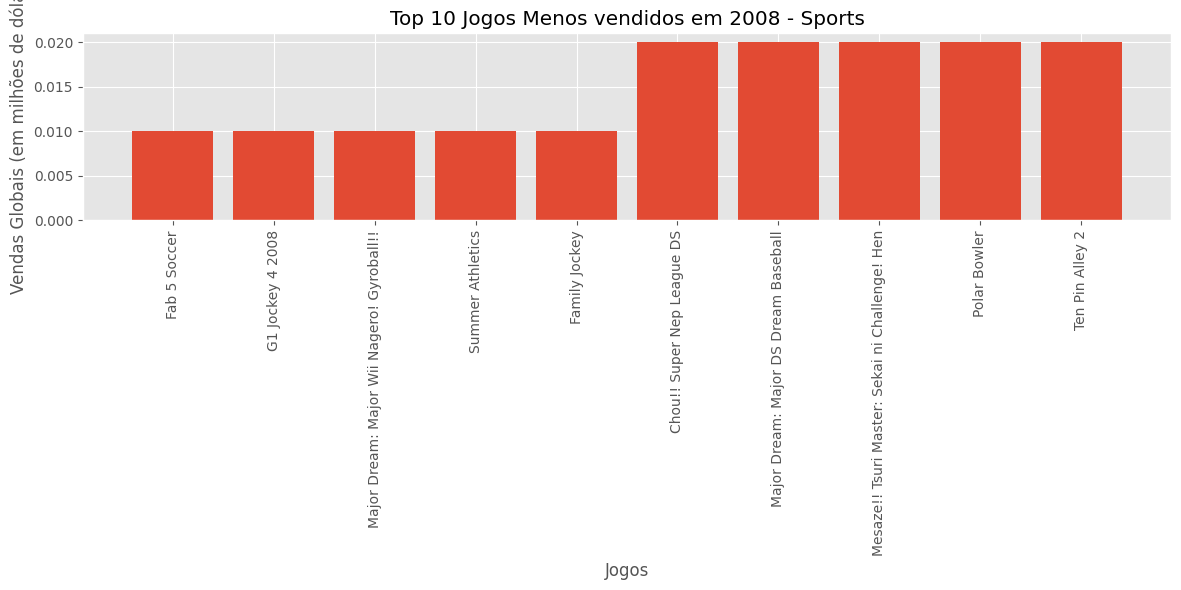

In [ ]:
jogos_2008_sports = dataset[(dataset['Ano'] == 2008) & (dataset['Gênero'] == 'Sports')]
jogo_menos_vendido = jogos_2008_sports.groupby('Nome')['Vendas Globais'].sum().sort_values().head(10)
display(jogo_menos_vendido)

plt.figure(figsize=(12, 6))
plt.bar(jogo_menos_vendido.index, jogo_menos_vendido.values)
plt.xlabel('Jogos')
plt.ylabel('Vendas Globais (em milhões de dólares)')
plt.title('Top 10 Jogos Menos vendidos em 2008 - Sports')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
display(dataset.head())


,Ranking,Nome,Plataforma,Ano,Gênero,Editora,Vendas América do Norte,Vendas EUA,Vendas Japão,Outras Vendas,Vendas Globais
0,259,Asteroids,2600,1980,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


Qual o percentual relacionado às vendas globais de jogos de Wii (excluindo-se América do norte, japão e europa) de 2006 até 2010?





In [ ]:
vendas_wii = dataset[(dataset['Ano'] >= 2006) & (dataset['Ano'] <= 2010) & (dataset['Plataforma'] == 'Wii')]
vendas_wii['Other_Sales'] = vendas_wii['Vendas Globais'] - (vendas_wii['Vendas América do Norte'] + vendas_wii['Vendas EUA'] + vendas_wii['Vendas Japão'])

total_vendas_globais = vendas_wii['Vendas Globais'].sum()
vendas_excluidas = vendas_wii['Outras Vendas'].sum()
percentual = (vendas_excluidas / total_vendas_globais) * 100
print(f"O percentual de vendas globais de jogos de Wii (excluindo América do Norte, Japão e Europa) de 2006 a 2010 é: {percentual:.2f}%")

O percentual de vendas globais de jogos de Wii (excluindo América do Norte, Japão e Europa) de 2006 a 2010 é: 8.75%


<ipython-input-39-e8058e33f720>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vendas_wii['Other_Sales'] = vendas_wii['Vendas Globais'] - (vendas_wii['Vendas América do Norte'] + vendas_wii['Vendas EUA'] + vendas_wii['Vendas Japão'])


Mostre um gráfico de linhas com as vendas em diferentes plataformas ao longo dos anos.


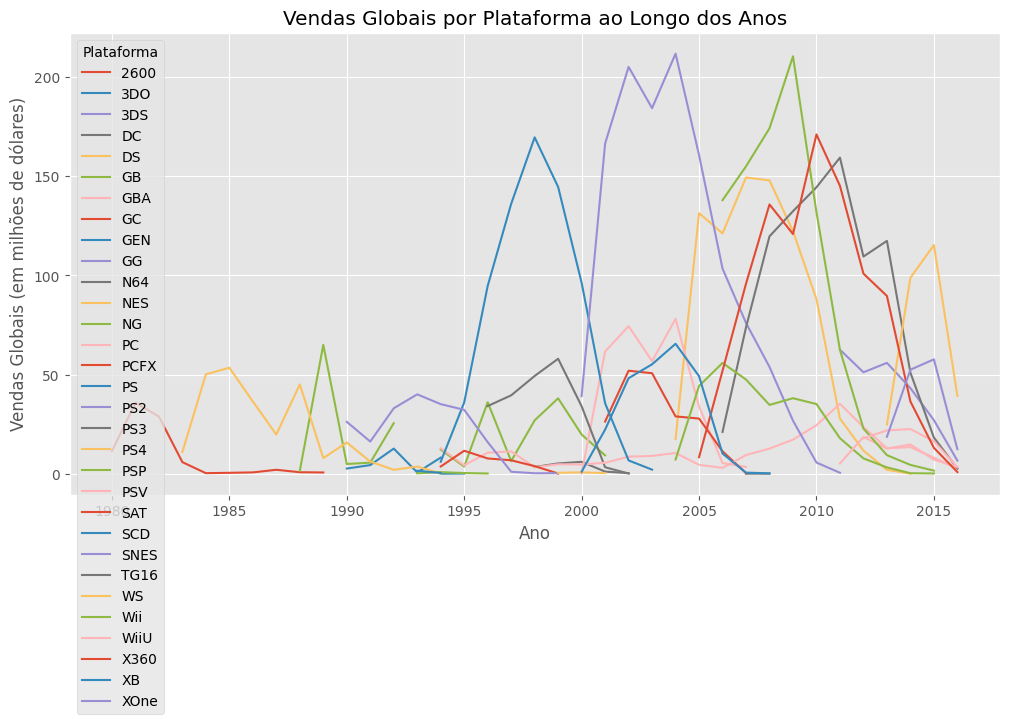

In [ ]:
vendas_por_ano_plataforma = dataset.groupby(['Ano', 'Plataforma'])['Vendas Globais'].sum().unstack()
vendas_por_ano_plataforma.plot(kind='line', figsize=(12, 6))
plt.xlabel('Ano')
plt.ylabel('Vendas Globais (em milhões de dólares)')
plt.title('Vendas Globais por Plataforma ao Longo dos Anos')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

Mostre um gráfico de pizza com o percentual de vendas dos diferentes gêneros de jogos.




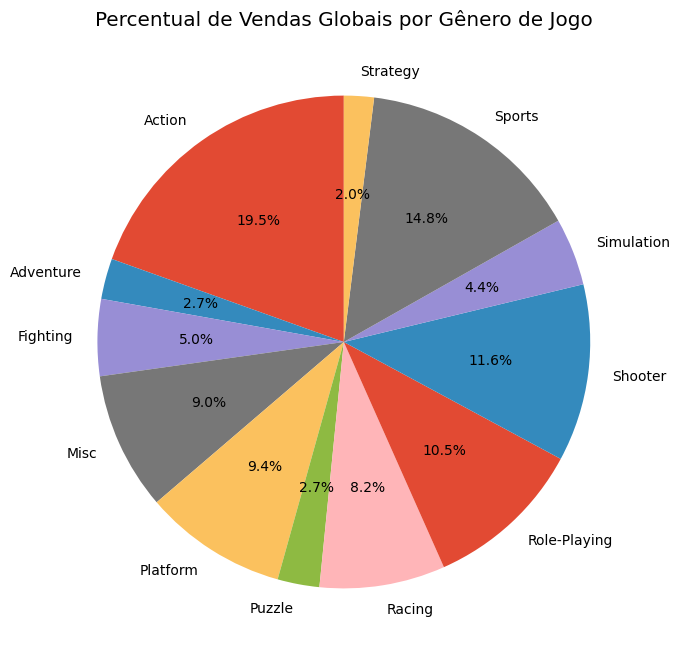

In [ ]:
vendas_por_genero = dataset.groupby('Gênero')['Vendas Globais'].sum()
plt.figure(figsize=(8, 8))
plt.pie(vendas_por_genero, labels=vendas_por_genero.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentual de Vendas Globais por Gênero de Jogo')
plt.show()

#Exercícios_pandas

Utilize os arquivos [livros.csv](https://drive.google.com/file/d/1fzuUyFxhzhE9U4_-i3IIUTwvgr3QG1Hj/view?usp=sharing), [livros_genero.csv](https://drive.google.com/file/d/1Cww5lAb7l_LQXVhH1ieyIOWIrqorNKcn/view?usp=sharing) e [livros_classicos.csv](https://drive.google.com/file/d/1pbSReiGSIIlHHXbFBOAaA5zTlNTrbY9P/view?usp=sharing) como entrada para o processamento requerido nos seguintes exercícios.


In [ ]:
livros = pd.read_csv("livros.csv")
livros_genero = pd.read_csv("livros_genero.csv")
livros_classicos = pd.read_csv("livros_classicos.csv")


Faça a concatenação das bases de dados livros.csv e livros_genero.csv e encontre qual o gênero de livro correspondente a cada livro.

In [ ]:
import pandas as pd

# Fazer a junção dos dados de livros com os dados de gêneros com base no autor
livros_com_genero = pd.merge(livros, livros_classicos, on='nome', how='left')



#livros_com_genero = pd.merge(livros_sem_genero, livros_genero, on='autor', how='left')

# Exibir o DataFrame resultante
print(livros_com_genero)



       nome  autor_x  autor_y
0   livro 1    Jorge    Jorge
1   livro 2   Santos   Santos
2   livro 3  Leandro  Leandro
3   livro 4    Clara    Clara
4   livro 5   Flavia   Flavia
5   livro 6  Leandro  Leandro
6   livro 7   Santos   Santos
7   livro 8   Marcia   Marcia
8   livro 9   Marcia   Marcia
9  livro 10    Clara    Clara


Faça a concatenação das bases de dados de livros e livros_genero e encontre qual os gêneros e os autores que não possuem um livro correspondente.

In [2]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')
livros_genero = pd.read_csv('livros_genero.csv')

# Adicionar uma coluna 'id_livro' fictícia
livros['id_livro'] = livros.index
livros_classicos['id_livro'] = livros_classicos.index + len(livros)
livros_genero['id_livro'] = livros_genero.index

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Concatenação das bases de dados de livros
todos_livros = pd.concat([livros, livros_classicos])

# Merge dos livros com os gêneros
livros_genero_merge = todos_livros.merge(livros_genero, how='right', on='id_livro')

# Encontrar gêneros e autores sem livro correspondente
generos_sem_livro = livros_genero_merge[livros_genero_merge['titulo'].isna()]['genero'].unique()
autores_sem_livro = livros_genero_merge[livros_genero_merge['titulo'].isna()]['autor_y'].unique()

# Mostrar os resultados
generos_sem_livro, autores_sem_livro

(array([], dtype=object), array([], dtype=object))

Faça a junção das bases de livros e livros clássicos.

In [4]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

# Adicionar uma coluna 'id_livro' fictícia
livros['id_livro'] = livros.index
livros_classicos['id_livro'] = livros_classicos.index + len(livros)

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Concatenação das bases de dados de livros
livros_juncao = pd.concat([livros, livros_classicos])

# Salvar o resultado em um novo arquivo CSV
livros_juncao.to_csv('livros_juncao.csv', index=False)

# Mostrar as primeiras linhas do resultado
print(livros_juncao.head())


    titulo  paginas  id_livro autor
0  livro 1    257.0         0   NaN
1  livro 2    106.0         1   NaN
2  livro 3    150.0         2   NaN
3  livro 4    175.0         3   NaN
4  livro 5    321.0         4   NaN


Faça a junção das bases de livros e livros clássicos apenas com os elementos em comum entre ambos e remova os índices dos antigos dataframes.

In [6]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Encontrar elementos em comum entre ambos os DataFrames
livros_comuns = pd.merge(livros, livros_classicos, on='titulo')

# Remover os índices antigos
livros_comuns.reset_index(drop=True, inplace=True)

# Salvar o resultado em um novo arquivo CSV (opcional)
livros_comuns.to_csv('livros_comuns.csv', index=False)

# Mostrar as primeiras linhas do resultado
print(livros_comuns.head())


    titulo  paginas    autor
0  livro 1      257    Jorge
1  livro 2      106   Santos
2  livro 3      150  Leandro
3  livro 4      175    Clara
4  livro 5      321   Flavia


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos.

In [7]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

# Adicionar uma coluna 'origem' para identificar a origem dos dados
livros['origem'] = 'livros'
livros_classicos['origem'] = 'livros_classicos'

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Encontrar elementos em comum entre ambos os DataFrames
livros_comuns = pd.merge(livros, livros_classicos, on='titulo')

# Remover os índices antigos
livros_comuns.reset_index(drop=True, inplace=True)

# Salvar o resultado em um novo arquivo CSV (opcional)
livros_comuns.to_csv('livros_comuns.csv', index=False)

# Mostrar as primeiras linhas do resultado
print(livros_comuns.head())


    titulo  paginas origem_x    autor          origem_y
0  livro 1      257   livros    Jorge  livros_classicos
1  livro 2      106   livros   Santos  livros_classicos
2  livro 3      150   livros  Leandro  livros_classicos
3  livro 4      175   livros    Clara  livros_classicos
4  livro 5      321   livros   Flavia  livros_classicos


Faça a junção das bases de livros e livros clássicos apenas com os elementos comuns entre ambos, e adicione chaves para o dataframe de livros e de livros clássicos, além de nomes para os índices.

In [8]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

# Adicionar uma coluna 'origem' para identificar a origem dos dados
livros['origem'] = 'livros'
livros_classicos['origem'] = 'livros_classicos'

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Encontrar elementos em comum entre ambos os DataFrames
livros_comuns = pd.merge(livros, livros_classicos, on='titulo', suffixes=('_livro', '_classico'))

# Adicionar nomes para os índices
livros_comuns.index.name = 'indice_comum'

# Remover os índices antigos
livros_comuns.reset_index(drop=True, inplace=True)

# Salvar o resultado em um novo arquivo CSV (opcional)
livros_comuns.to_csv('livros_comuns.csv', index=False)

# Mostrar as primeiras linhas do resultado
print(livros_comuns.head())


    titulo  paginas origem_livro    autor   origem_classico
0  livro 1      257       livros    Jorge  livros_classicos
1  livro 2      106       livros   Santos  livros_classicos
2  livro 3      150       livros  Leandro  livros_classicos
3  livro 4      175       livros    Clara  livros_classicos
4  livro 5      321       livros   Flavia  livros_classicos


Faça a junção das bases de dados livros e livros_classicos e verifique a integridade do dataframe resultante.

In [9]:
import pandas as pd

# Carregar os dados dos arquivos CSV
livros = pd.read_csv('livros.csv')
livros_classicos = pd.read_csv('livros_classicos.csv')

# Adicionar uma coluna 'origem' para identificar a origem dos dados
livros['origem'] = 'livros'
livros_classicos['origem'] = 'livros_classicos'

# Ajustar os nomes das colunas para permitir a concatenação
livros = livros.rename(columns={'nome': 'titulo'})
livros_classicos = livros_classicos.rename(columns={'nome': 'titulo'})

# Concatenação das bases de dados de livros
todos_livros = pd.concat([livros, livros_classicos])

# Verificar a integridade do DataFrame resultante
# Verificar valores nulos
valores_nulos = todos_livros.isnull().sum()

# Verificar duplicatas
duplicatas = todos_livros.duplicated().sum()

# Exibir o resultado da verificação de integridade
print("Verificação de Integridade do DataFrame Resultante:")
print("Valores Nulos por Coluna:")
print(valores_nulos)
print("\nNúmero de Duplicatas:")
print(duplicatas)

# Mostrar as primeiras linhas do DataFrame resultante
print("\nPrimeiras linhas do DataFrame resultante:")
print(todos_livros.head())


Verificação de Integridade do DataFrame Resultante:
Valores Nulos por Coluna:
titulo      0
paginas    10
origem      0
autor      10
dtype: int64

Número de Duplicatas:
0

Primeiras linhas do DataFrame resultante:
    titulo  paginas  origem autor
0  livro 1    257.0  livros   NaN
1  livro 2    106.0  livros   NaN
2  livro 3    150.0  livros   NaN
3  livro 4    175.0  livros   NaN
4  livro 5    321.0  livros   NaN
